In [1]:
%load_ext autoreload
%autoreload 2

# MTBO Demo

In [10]:
from summit.strategies import MTBO, Random
from summit.benchmarks import Himmelblau, Hartmann3D
from summit.utils.dataset import DataSet
from summit import Runner
import summit
import pathlib
import pandas as pd

## Benchmarks

We create the himmelblau and a modified version that is shifted up and scaled.

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

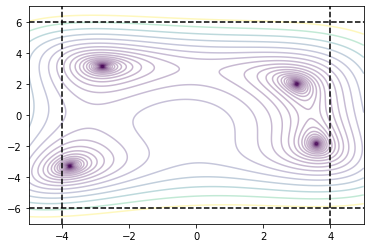

In [11]:
exp = Himmelblau()
exp.plot()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

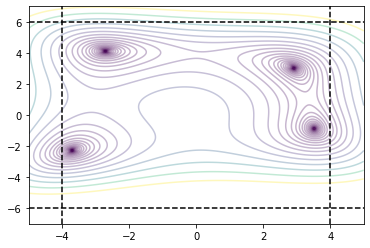

In [12]:
exp_modified = Himmelblau()
# Shift and scale function
exp_modified.equation = "1.5*((x_1**2 + x_2 - 11.5)**2+(x_1 + (x_2-1)**2 -7)**2)"
exp_modified.plot()

## Create pretraining data

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

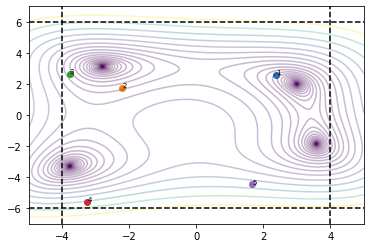

In [24]:
exp.reset()
random = Random(exp.domain)
conditions = random.suggest_experiments(5)
results = exp.run_experiments(conditions)
exp.plot()

In [21]:
pt_data = exp.data
pt_data[('task', 'METADATA')] = 0
pt_data

,x_1,x_2,y,computation_t,experiment_t,strategy,task
0,0.270971,5.618351,645.045769,0.0,0.003424,Random,0
1,-2.263401,-5.754529,704.172918,0.0,0.003428,Random,0
2,-3.546026,-5.855144,581.756009,0.0,0.003187,Random,0
3,-1.810621,0.972436,107.409974,0.0,0.003034,Random,0
4,3.892650,5.207365,664.057497,0.0,0.003043,Random,0
...,...,...,...,...,...,...,...
95,1.496378,-2.953829,147.611741,0.0,0.002798,Random,0
96,-2.530255,3.973566,39.564358,0.0,0.002816,Random,0
97,2.786945,-2.773157,48.165089,0.0,0.002917,Random,0
98,-1.725196,-1.606205,130.499762,0.0,0.002815,Random,0


## Multitask optimization on modified Himmelblau

In [25]:
exp.domain

Name,Type,Description,Values
x_1,"continuous, input",Input 1,"[-4,4]"
x_2,"continuous, input",Input 2,"[-6,6]"
y,"continuous, minimize objective",Function value,"[-1000,0]"


In [29]:
exp_modified.reset()
strategy = MTBO(exp_modified.domain, pretraining_data = pt_data, task=1)
r = Runner(strategy=strategy, experiment=exp_modified, max_iterations=10)
r.run()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

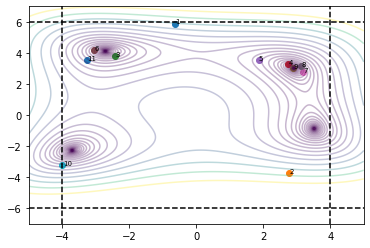

In [30]:
exp_modified.plot()